In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sys
from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings('ignore')

breast = load_breast_cancer() 
breast_data = breast.data
breast_data.shape

(569, 30)

In [2]:
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1) 

breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names 

features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels 

In [3]:
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, labels, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

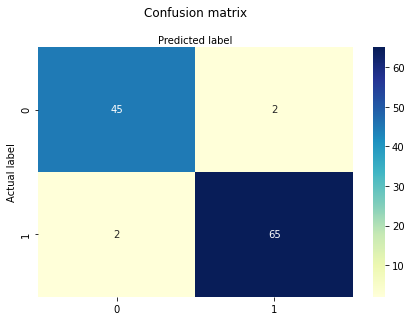

In [5]:
#Problem 1

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred)

from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [18]:
#Problem 2

X = breast_input
Y = breast_labels


from sklearn.decomposition import PCA
for n in range(1, 31):
    pca = PCA(n_components=n) 
    principalComponents = pca.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 0)
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test)
    
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred)
    
from sklearn import metrics 
print("PCA at K=%i" %n)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

PCA at K=30
Accuracy: 0.9473684210526315
Precision: 0.9841269841269841
Recall: 0.9253731343283582


[[12 32]
 [26 44]]
Accuracy: 0.49122807017543857
Precision: 0.5789473684210527
Recall: 0.6285714285714286


Text(0.5, 257.44, 'Predicted label')

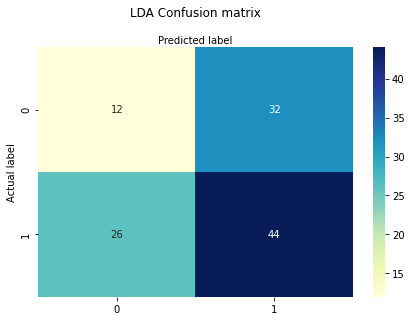

In [12]:
#Problem 3

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X=breast_input
y=breast_labels
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,y)

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2) 
lda.fit(X_train,Y_train) 
y_pred = lda.predict(X_test) 

from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
print(cnf_matrix)
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 


import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('LDA Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

[[38  2]
 [ 0 74]]
Accuracy: 0.9824561403508771
Precision: 0.9736842105263158
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

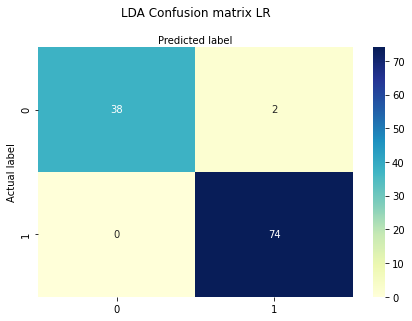

In [11]:
#Problem 4

classifier = LogisticRegression(random_state=0)

X=breast_input
y=breast_labels
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,y)

classifier.fit(lda_t,y)

X_train,X_test,Y_train,Y_test = train_test_split(lda_t,y,test_size=0.2) 

Y_pred = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
print(cnf_matrix)
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 


import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('LDA Confusion matrix LR', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')